# 狗股策略示例

##### （本示例中使用的数据并未在data中给出）

1、什么是攻守兼备的“狗股策略”？
​ 狗股理论是美国基金经理迈克尔·奥希金斯于1991年提出的一种投资策略。具体的做法是，投资者每年年底从道琼斯工业平均指数成份股中找出10只股息率最高的股票，新年买入，一年后再找出10只股息率最高的成分股，卖出手中不在名单中的股票，买入新上榜单的股票，每年年初年底都重复这一投资动作，便可获取超过大盘的回报。据有关统计，1975至1999年运用"狗股理论"，投资的平均复利回报达18%，远高于市场3%的平均水平。

​ 投资高息股，可以称得上是攻守兼备的策略。当股价低迷时，只要能获得高于银行定期存款的股息，就相当于为资金构建了一个保护伞，此为“守”；而当股价上扬时，不但能继续享受股息收入，还能让资产像坐轿子一样升值，高位抛出的话，可赚取资本利得，此为“攻”。

​ 从量化的角度来看，这个策略，本质上是一个单因子策略—以股息率为因子，买入股息率较高的策略。

​ 此策略比较适合不会基本面分析，难于找到价值被低估的股票却又希望能够找到一个跑赢大盘的散户使用。



2、策略回测
​ 策略原理：每年8月的第一个交易日结束，先清仓过去持有的股票，然后筛选出N只股息率最高的股票，每次开仓的时候使用90%的资金，并且平分到N只股票上，然后在第二个交易日开盘买入，持有一年时间，到第二年的8月份。不断重复同样的操作，期待能够获取超过超额收益率。

​ 策略有效性分析：高的股息率一般代表着这个公司的经营比较好，客观上能够获得股息收益，这个是实实在在的。投资30个股票，在某种程度上，分散了个股的特有风险。之所以在每年8月份调整仓位，是因为A股的好多股息发放是在每年的六七月份，发放过股息之后，才能确定这个股票的股息率怎么样。

​ 交易费用：每次交易按照万分之二的手续费

​ 数据来源：A股后复权的日数据来自于聚宽；股息率数据来自于优矿。

3、回测结果

| 夏普率 | 复利年化收益率 | 最大回撤率 |
|--------|----------------|------------|
| 0.702  | 0.183          | -0.617     |

最大回撤发生在2008年股灾。除了这个，股息率策略，表现算得上比较好的了，操作简单，收益率不错。从2006年到2019年底，复利年化收益率能够达到20%以上的，有多少人呢？坚持这个简单的策略，你就很可能跑赢95%以上的投资者了

加载数据完毕
2006-01-04, 1
2006-01-05, 2
2006-01-06, 3
2006-01-09, 4
2006-01-10, 5
2006-01-11, 6
2006-01-12, 7
2006-01-13, 8
2006-01-16, 9
2006-01-17, 10
2006-01-18, 11
2006-01-19, 12
2006-01-20, 13
2006-01-23, 14
2006-01-24, 15
2006-01-25, 16
2006-02-06, 17
2006-02-07, 18
2006-02-08, 19
2006-02-09, 20
2006-02-10, 21
2006-02-13, 22
2006-02-14, 23
2006-02-15, 24
2006-02-16, 25
2006-02-17, 26
2006-02-20, 27
2006-02-21, 28
2006-02-22, 29
2006-02-23, 30
2006-02-24, 31
2006-02-27, 32
2006-02-28, 33
2006-03-01, 34
2006-03-02, 35
2006-03-03, 36
2006-03-06, 37
2006-03-07, 38
2006-03-08, 39
2006-03-09, 40
2006-03-10, 41
2006-03-13, 42
2006-03-14, 43
2006-03-15, 44
2006-03-16, 45
2006-03-17, 46
2006-03-20, 47
2006-03-21, 48
2006-03-22, 49
2006-03-23, 50
2006-03-24, 51
2006-03-27, 52
2006-03-28, 53
2006-03-29, 54
2006-03-30, 55
2006-03-31, 56
2006-04-03, 57
2006-04-04, 58
2006-04-05, 59
2006-04-06, 60
2006-04-07, 61
2006-04-10, 62
2006-04-11, 63
2006-04-12, 64
2006-04-13, 65
2006-04-14, 66
2006-04-17, 

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,66.97,2008-01-14,2008-11-04,2009-08-03,406
1,43.29,2015-06-12,2015-08-25,2019-04-01,992
2,35.84,2010-11-29,2013-07-08,2014-11-03,1026
3,23.51,2019-04-09,2020-02-03,2020-07-09,328
4,22.45,2007-05-29,2007-06-04,2007-08-06,50


Stress Events,mean,min,max
Lehman,-0.68%,-7.33%,8.45%
US downgrade/European Debt Crisis,-0.30%,-4.19%,2.05%
Fukushima,-0.14%,-2.27%,0.94%
EZB IR Event,0.00%,-2.55%,2.46%
Aug07,0.61%,-3.07%,5.37%
Mar08,-1.03%,-6.30%,4.63%
Sept08,-0.36%,-6.89%,8.45%
2009Q1,0.77%,-6.63%,5.27%
2009Q2,0.64%,-5.63%,6.81%
Flash Crash,-1.00%,-3.07%,2.40%


Top 10 long positions of all time,max
601800,24.35%
000876,23.31%
000584,22.89%
000651,18.56%
002242,18.38%
600005,18.10%
300741,17.65%
000911,17.28%
000550,17.13%
600317,16.37%


Top 10 short positions of all time,max


Top 10 positions of all time,max
601800,24.35%
000876,23.31%
000584,22.89%
000651,18.56%
002242,18.38%
600005,18.10%
300741,17.65%
000911,17.28%
000550,17.13%
600317,16.37%


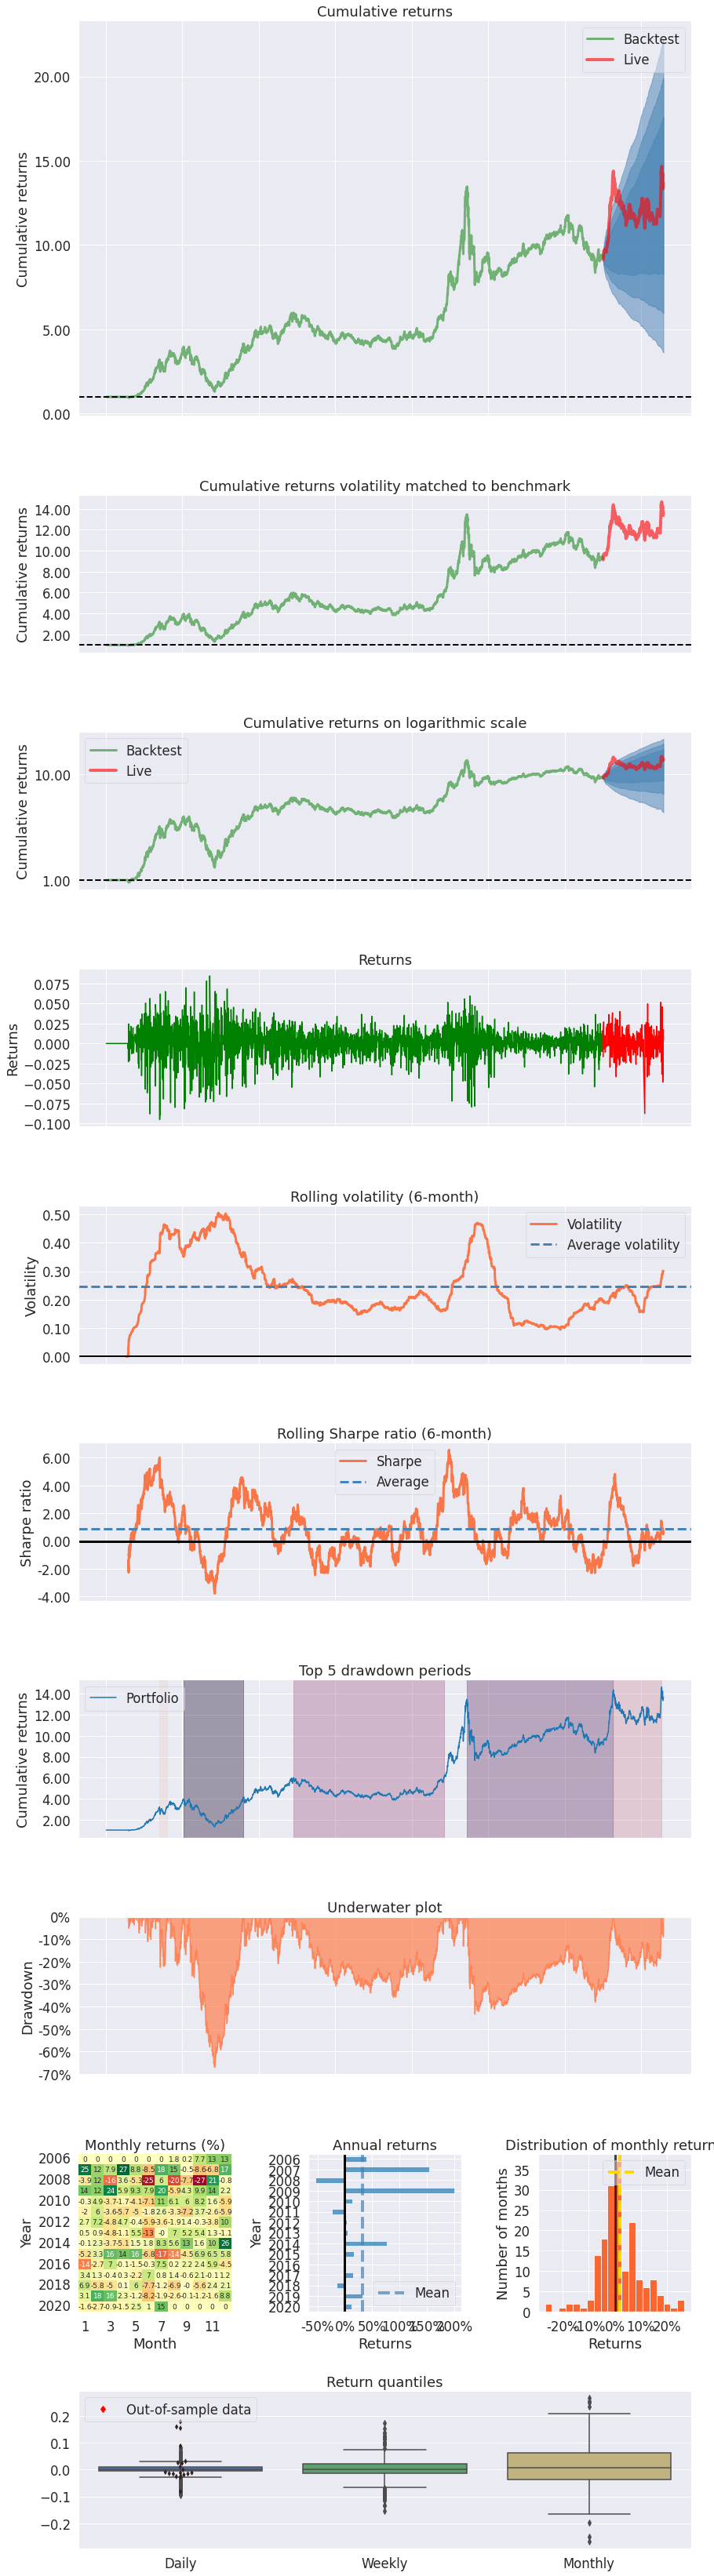

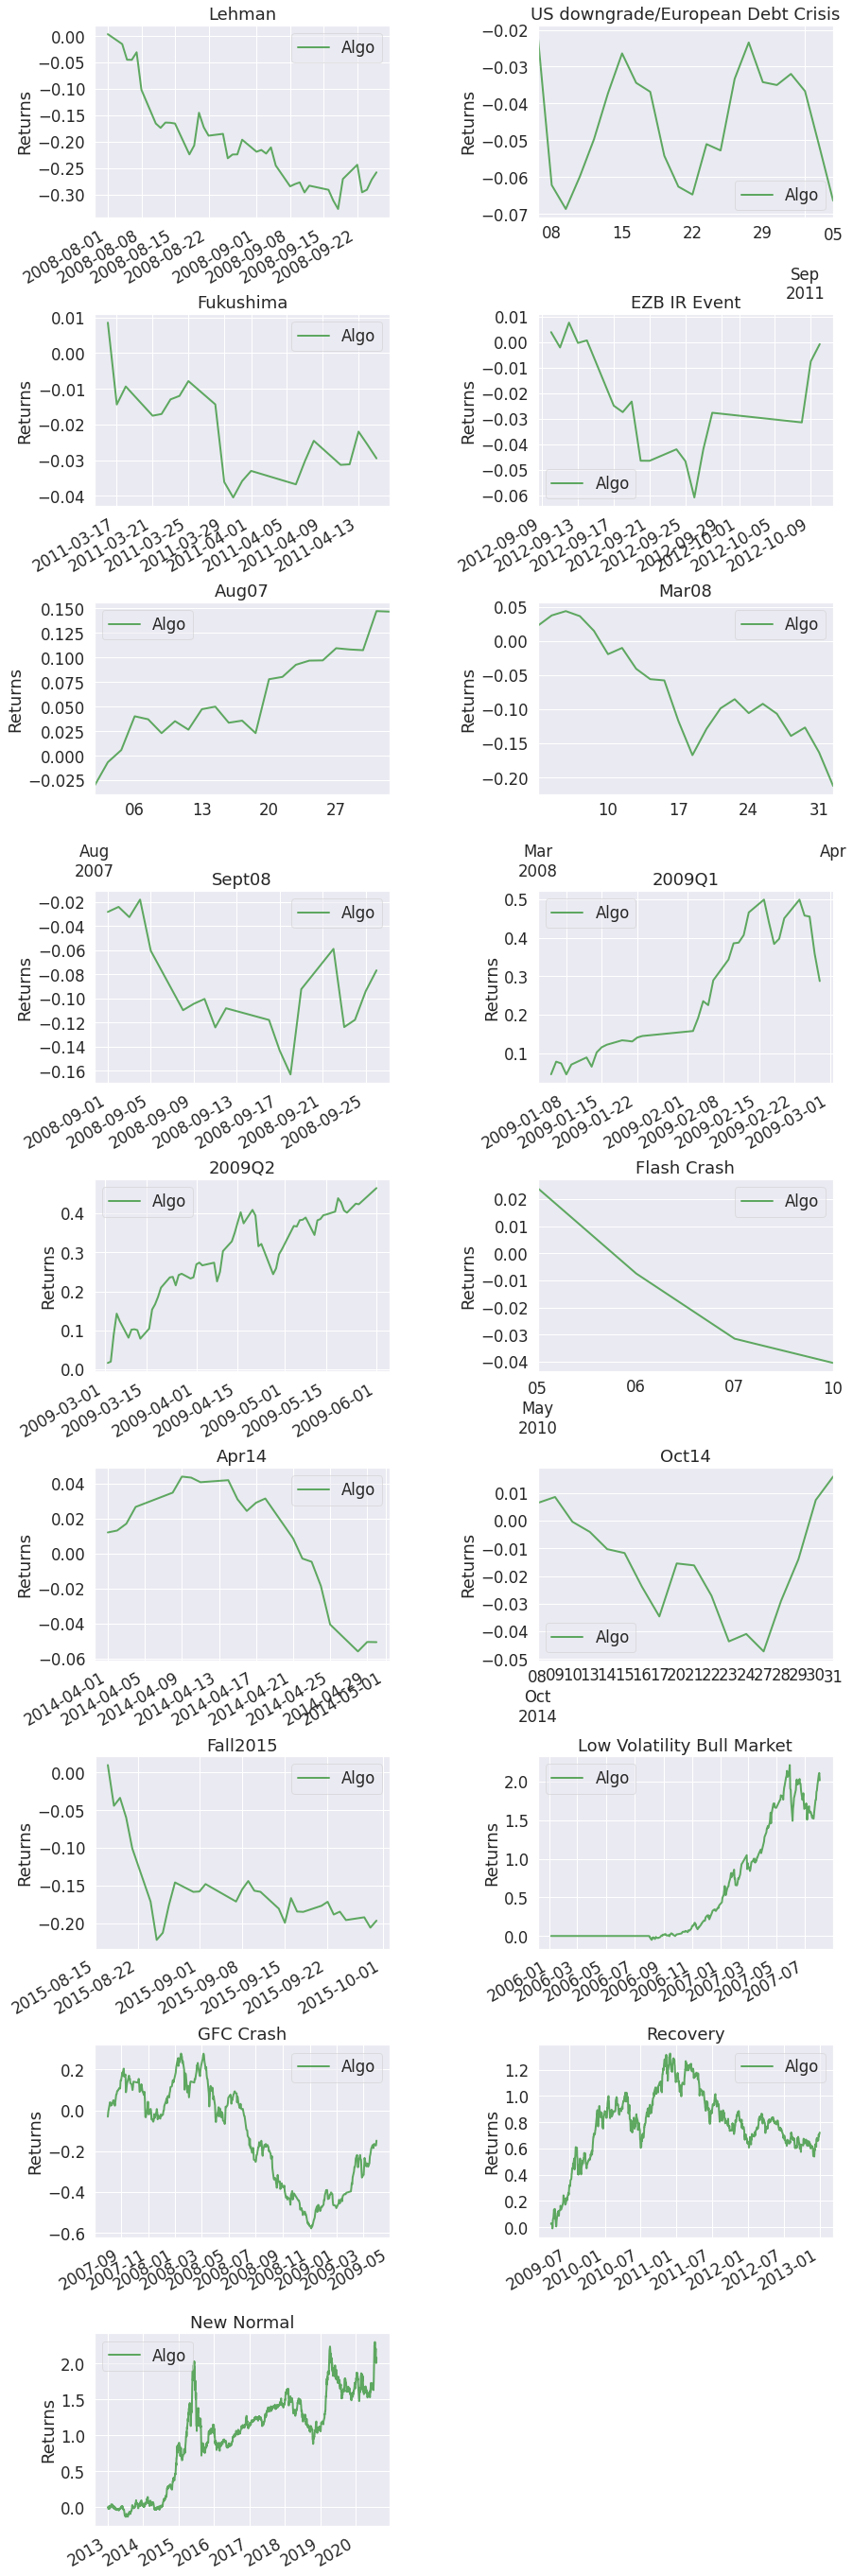

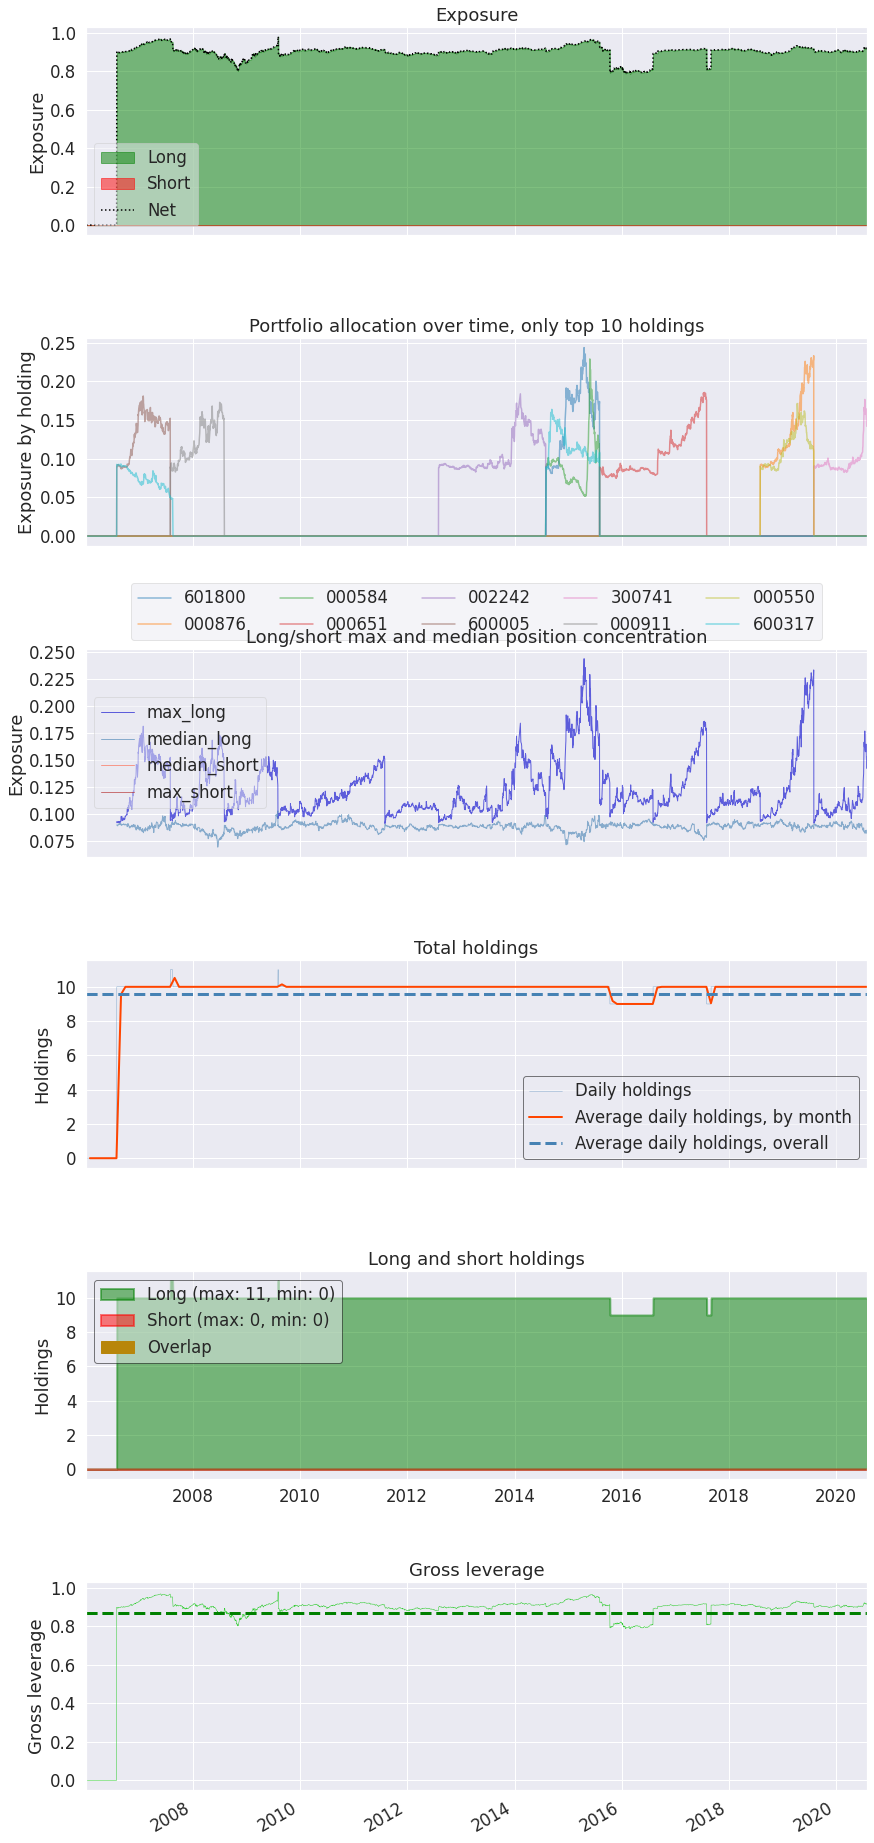

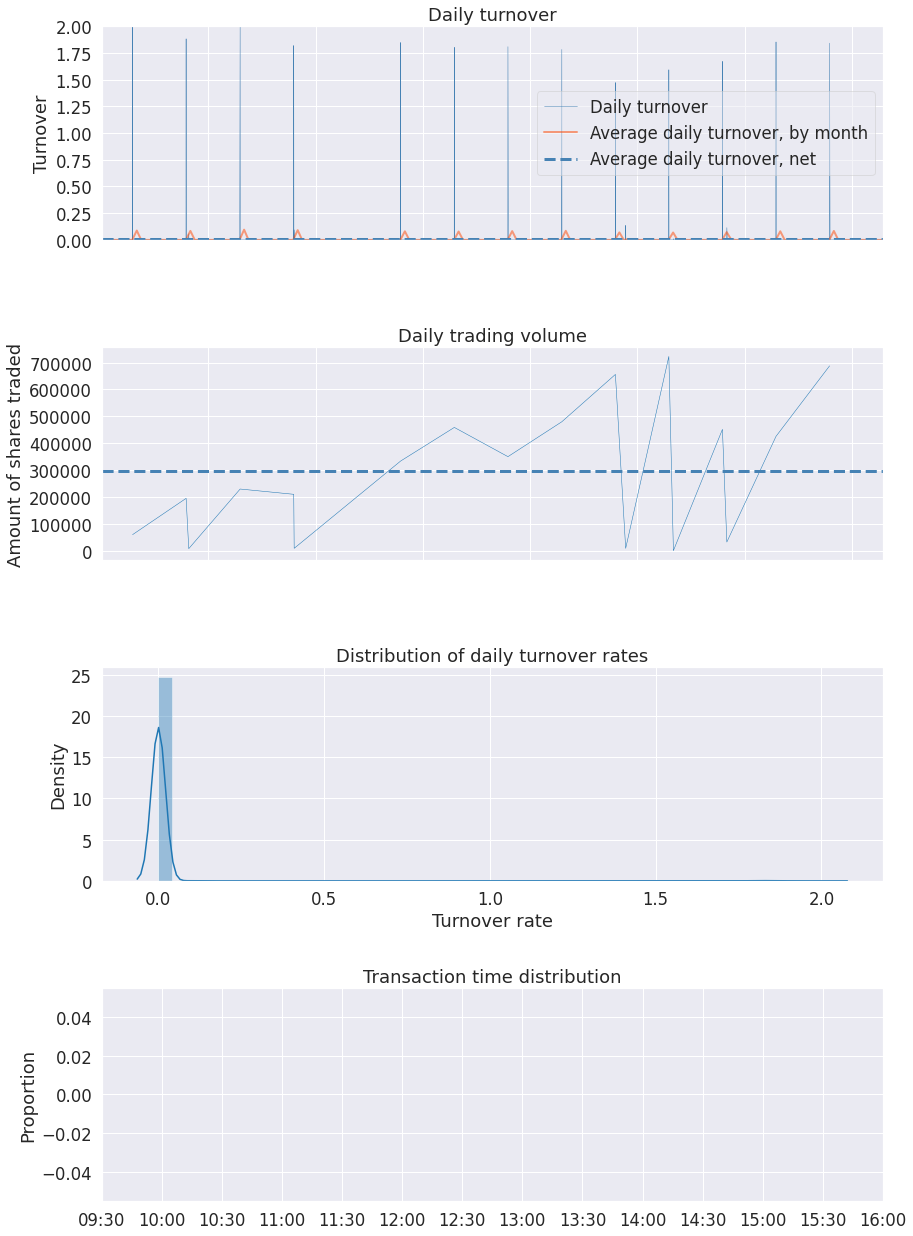

In [20]:
import backtesting as bt
import datetime
import pandas as pd
import numpy as np
import os,sys
import pyfolio as pf
import warnings
warnings.filterwarnings("ignore")

data_root = "./stock/day/"
file_list0 =sorted(os.listdir(data_root))
file_list=[]
for file in file_list0:
    if len(pd.read_csv(data_root+file))>=252:
        file_list.append(file)
file_llist=[file[:-4] for file in file_list]
# 我们使用的时候，直接用我们新的类读取数据就可以了。
class test_divdend_rate_strategy(bt.Strategy):
   
    params = (('window',200),)

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('{}, {}'.format(dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.bar_num=0
        #要求./stock/股票历史股息率数据.csv的SECID是file_list的前20个
        df = pd.read_csv("./stock/股票历史股息率数据.csv",index_col=0)
        self.stock_divdend_info = df[df['secID'].isin(file_llist)]
        # self.stock_divdend_info = pd.read_csv("./stock/股票历史股息率数据.csv",index_col=0)
        self.buy_list=[]
        self.value_list = []
        self.trade_list = []
        self.order_list = []
       
    def prenext(self):
        
        self.next()
        
        
    def next(self):
        # 假设有100万资金，每次成份股调整，每个股票使用1万元
        self.bar_num+=1
        self.log(self.bar_num)
        # 需要调仓的时候
        pre_current_date = self.datas[0].datetime.date(-1).strftime("%Y-%m-%d")
        current_date = self.datas[0].datetime.date(0).strftime("%Y-%m-%d")
        total_value = self.broker.get_value()
        self.value_list.append([current_date,total_value])
        # 如果是8月的第一个交易日
        if current_date[5:7]=='08' and pre_current_date[5:7]!='08':
            # 获取当前股息率前10的股票
            divdend_info  = self.stock_divdend_info[self.stock_divdend_info['tradeDate']==current_date]
            divdend_info = divdend_info.sort_values("divRate",ascending=False)
            divdend_info = divdend_info.drop_duplicates("secID")
            divdend_stock_list= [i.split('.')[0] for i in list(divdend_info['secID'])]
            if len(divdend_stock_list)>10:
                stock_list= divdend_stock_list[:10]
            else:
                stock_list= divdend_stock_list
            self.log(stock_list)
            # 平掉原来的仓位
            for stock in self.buy_list:
                data = self.getdatabyname(stock)
                if self.getposition(data).size>0:
                    self.close(data)
            # 取消所有未成交的订单
            for order in self.order_list:
                self.cancel(order)
                # self.log(order)
            self.buy_list = stock_list
            
            value =0.90*self.broker.getvalue()/len(stock_list)
            # 开新的仓位，按照90%的比例开
            for stock in stock_list:
                data = self.getdatabyname(stock)
                # 没有把手数设定为100的倍数
                lots = value/data.close[0]
                order = self.buy(data,size = lots)
                self.log(f"symbol:{data._name},price:{data.close[0]}")
                self.order_list.append(order)
            
    
        
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # order被提交和接受
            return
        if order.status == order.Rejected:
            self.log(f"order is rejected : order_ref:{order.ref}  order_info:{order.info}")
        if order.status == order.Margin:
            self.log(f"order need more margin : order_ref:{order.ref}  order_info:{order.info}")
        if order.status == order.Cancelled:
            self.log(f"order is concelled : order_ref:{order.ref}  order_info:{order.info}")
        if order.status == order.Partial:
            self.log(f"order is partial : order_ref:{order.ref}  order_info:{order.info}")
        # Check if an order has been completed
        # Attention: broker could reject order if not enougth cash
        if order.status == order.Completed:
            if order.isbuy():
                self.log("buy result : buy_price : {} , buy_cost : {} , commission : {}".format(
                            order.executed.price,order.executed.value,order.executed.comm))
                
            else:  # Sell
                self.log("sell result : sell_price : {} , sell_cost : {} , commission : {}".format(
                            order.executed.price,order.executed.value,order.executed.comm))
    
    def notify_trade(self, trade):
        # 一个trade结束的时候输出信息
        if trade.isclosed:
            self.log('closed symbol is : {} , total_profit : {} , net_profit : {}' .format(
                            trade.getdataname(),trade.pnl, trade.pnlcomm))
            self.trade_list.append([self.datas[0].datetime.date(0),trade.getdataname(),trade.pnl,trade.pnlcomm])
            
        if trade.isopen:
            self.log('open symbol is : {} , price : {} ' .format(
                            trade.getdataname(),trade.price))
    def stop(self):
        pass
        value_df = pd.DataFrame(self.value_list)
        value_df.columns=['datetime','value']
        value_df.to_csv("股息率value结果_狗股0.csv")
        
        trade_df = pd.DataFrame(self.trade_list)
        # trade_df.columns =['datetime','name','pnl','net_pnl']
        trade_df.to_csv("股息率-trade结果_狗股0.csv")
                
        
# 初始化cerebro,获得一个实例
cerebro = bt.Cerebro()
# cerebro.broker = bt.brokers.BackBroker(shortcash=True)  # 0.5%

params=dict(
    fromdate = datetime.datetime(2006,1,4),
    todate = datetime.datetime(2020,7,31),
    timeframe = bt.TimeFrame.Days,
    dtformat = ("%Y-%m-%d"),
    compression = 1,
    datetime = 0,
    open = 1,
    high = 2,
    low =3,
    close =4,
    volume =5,
    openinterest=-1)
    
# 读取数据
for file in file_list:
    feed = bt.feeds.GenericCSVData(dataname = data_root+file,**params)
    # 添加数据到cerebro
    cerebro.adddata(feed, name = file.split('.')[0])
print("加载数据完毕")
# 添加手续费，按照万分之二收取
cerebro.broker.setcommission(commission=0.0002,stocklike=True)
# 设置初始资金为100万
cerebro.broker.setcash(1000000.0)
# 添加策略
cerebro.addstrategy(test_divdend_rate_strategy)
cerebro.addanalyzer(bt.analyzers.TotalValue, _name='_TotalValue')
cerebro.addanalyzer(bt.analyzers.PyFolio)
# 运行回测
results = cerebro.run()
# 打印相关信息
pyfoliozer = results[0].analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
pf.create_full_tear_sheet(
    returns,
    positions=positions,
    transactions=transactions,
    # gross_lev=gross_lev,
    live_start_date='2019-01-01',
    )